# Leads Scoring Case Study

## Reading and understanding Data

In [1311]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1312]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler

In [1313]:
# Let's read the Leads file into a dataframe
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1314]:
# Inspecting datatypes & non-null objects in each column
df.info()

# Shape of dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

(9240, 37)

In [1315]:
# Let's inspect the statistics of all continuous variables in the dataset
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


__We see some outliers in some columns and will handle them at a later stage.__

In [1316]:
# Inspecting conversion rate for the entire data set
df.Converted.sum()/len(df.index)*100

38.53896103896104

In [1317]:
# Let's change the column names to lower case
df.columns = [x.lower() for x in df.columns]
df.head()

,prospect id,lead number,lead origin,lead source,do not email,do not call,converted,totalvisits,total time spent on website,page views per visit,...,get updates on dm content,lead profile,city,asymmetrique activity index,asymmetrique profile index,asymmetrique activity score,asymmetrique profile score,i agree to pay the amount through cheque,a free copy of mastering the interview,last notable activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Cleaning

In [1318]:
# We have some columns such as specialization, how did you hear about x education, lead profile & city which have values such as
# Select. These need to be treated as null values. So, let's convert all the select values to null values
df = df.replace('Select', np.nan)

In [1319]:
# Checking for number of null values in each column
df.isnull().sum()

prospect id                                         0
lead number                                         0
lead origin                                         0
lead source                                        36
do not email                                        0
do not call                                         0
converted                                           0
totalvisits                                       137
total time spent on website                         0
page views per visit                              137
last activity                                     103
country                                          2461
specialization                                   3380
how did you hear about x education               7250
what is your current occupation                  2690
what matters most to you in choosing a course    2709
search                                              0
magazine                                            0
newspaper article           

In [1320]:
# Percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2) 

prospect id                                       0.00
lead number                                       0.00
lead origin                                       0.00
lead source                                       0.39
do not email                                      0.00
do not call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total time spent on website                       0.00
page views per visit                              1.48
last activity                                     1.11
country                                          26.63
specialization                                   36.58
how did you hear about x education               78.46
what is your current occupation                  29.11
what matters most to you in choosing a course    29.32
search                                            0.00
magazine                                          0.00
newspaper 

In [1321]:
# Let's drop the columns with more than 25% null values as droping the rows would lead to loss of data.
df.drop(['lead profile', 'lead quality', 'asymmetrique activity index', 'asymmetrique profile index', 'asymmetrique activity score',
         'asymmetrique profile score', 'how did you hear about x education', 'city', 'country','specialization', 
         'what is your current occupation', 'what matters most to you in choosing a course', 'tags'], axis=1, inplace = True)

In [1322]:
# Percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2) 

prospect id                                 0.00
lead number                                 0.00
lead origin                                 0.00
lead source                                 0.39
do not email                                0.00
do not call                                 0.00
converted                                   0.00
totalvisits                                 1.48
total time spent on website                 0.00
page views per visit                        1.48
last activity                               1.11
search                                      0.00
magazine                                    0.00
newspaper article                           0.00
x education forums                          0.00
newspaper                                   0.00
digital advertisement                       0.00
through recommendations                     0.00
receive more updates about our courses      0.00
update me on supply chain content           0.00
get updates on dm co

In [1323]:
# Let's remove the remaining null values from the columns by removing the rows
df = df[~pd.isnull(df['lead source'])]
df = df[~pd.isnull(df['totalvisits'])]
df = df[~pd.isnull(df['page views per visit'])]
df = df[~pd.isnull(df['last activity'])]
round(100*(df.isnull().sum()/len(df.index)), 2) 

prospect id                                 0.0
lead number                                 0.0
lead origin                                 0.0
lead source                                 0.0
do not email                                0.0
do not call                                 0.0
converted                                   0.0
totalvisits                                 0.0
total time spent on website                 0.0
page views per visit                        0.0
last activity                               0.0
search                                      0.0
magazine                                    0.0
newspaper article                           0.0
x education forums                          0.0
newspaper                                   0.0
digital advertisement                       0.0
through recommendations                     0.0
receive more updates about our courses      0.0
update me on supply chain content           0.0
get updates on dm content               

In [1324]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
prospect id                                 9074 non-null object
lead number                                 9074 non-null int64
lead origin                                 9074 non-null object
lead source                                 9074 non-null object
do not email                                9074 non-null object
do not call                                 9074 non-null object
converted                                   9074 non-null int64
totalvisits                                 9074 non-null float64
total time spent on website                 9074 non-null int64
page views per visit                        9074 non-null float64
last activity                               9074 non-null object
search                                      9074 non-null object
magazine                                    9074 non-null object
newspaper article                           9074 

(9074, 24)

In [1325]:
# Let's inspect some variables with binary values for variance
print(df['i agree to pay the amount through cheque'].value_counts())

print(df['a free copy of mastering the interview'].value_counts())

print(df['get updates on dm content'].value_counts())

print(df['update me on supply chain content'].value_counts())

print(df['receive more updates about our courses'].value_counts())

print(df['do not call'].value_counts())

print(df['do not email'].value_counts())

print(df['search'].value_counts())

print(df['magazine'].value_counts())

print(df['newspaper article'].value_counts())

print(df['newspaper'].value_counts())

print(df['x education forums'].value_counts())

print(df['through recommendations'].value_counts())

No    9074
Name: i agree to pay the amount through cheque, dtype: int64
No     6186
Yes    2888
Name: a free copy of mastering the interview, dtype: int64
No    9074
Name: get updates on dm content, dtype: int64
No    9074
Name: update me on supply chain content, dtype: int64
No    9074
Name: receive more updates about our courses, dtype: int64
No     9072
Yes       2
Name: do not call, dtype: int64
No     8358
Yes     716
Name: do not email, dtype: int64
No     9060
Yes      14
Name: search, dtype: int64
No    9074
Name: magazine, dtype: int64
No     9072
Yes       2
Name: newspaper article, dtype: int64
No     9073
Yes       1
Name: newspaper, dtype: int64
No     9073
Yes       1
Name: x education forums, dtype: int64
No     9067
Yes       7
Name: through recommendations, dtype: int64


__We can see some variables with no variance such as 'i agree to pay the amount through cheque', 'magzine' etc. These rows can be removed as they will not make much difference during model building.__

In [1326]:
# Droping columns with no / negigible variance
df.drop(['i agree to pay the amount through cheque', 'receive more updates about our courses',
        'update me on supply chain content', 'get updates on dm content', 'digital advertisement',
        'x education forums', 'newspaper', 'newspaper article', 'magazine'], axis=1, inplace=True)

In [1327]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
prospect id                               9074 non-null object
lead number                               9074 non-null int64
lead origin                               9074 non-null object
lead source                               9074 non-null object
do not email                              9074 non-null object
do not call                               9074 non-null object
converted                                 9074 non-null int64
totalvisits                               9074 non-null float64
total time spent on website               9074 non-null int64
page views per visit                      9074 non-null float64
last activity                             9074 non-null object
search                                    9074 non-null object
through recommendations                   9074 non-null object
a free copy of mastering the interview    9074 non-null object
last notable

(9074, 15)

In [1328]:
# Let's inspect the statistics of all continuous variables in the dataset
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,lead number,converted,totalvisits,total time spent on website,page views per visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


## Outlier Treatment

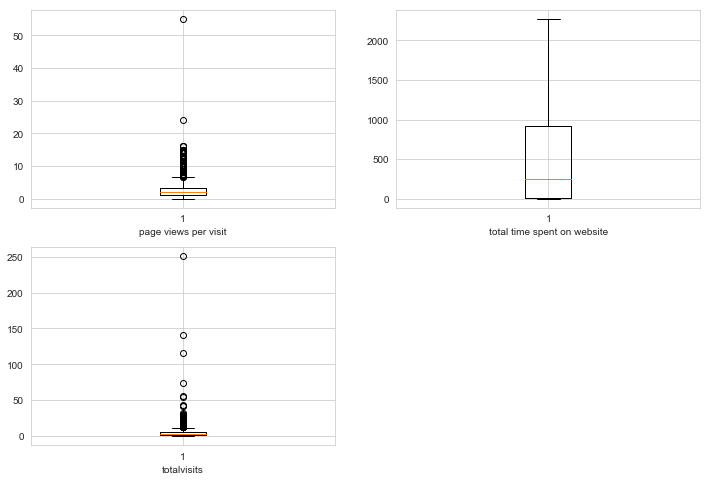

In [1329]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.boxplot(df['page views per visit'])
plt.xlabel('page views per visit')
plt.subplot(2,2,2)
plt.boxplot(df['total time spent on website'])
plt.xlabel('total time spent on website')
plt.subplot(2,2,3)
plt.boxplot(df['totalvisits'])
plt.xlabel('totalvisits')
plt.show()

In [1330]:
# Removing outliers from 'page views per visit'
Q1 = df['page views per visit'].quantile(0.25)
Q3 = df['page views per visit'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['page views per visit'] >= Q1 - 1.5*IQR) & (df['page views per visit'] <= Q3 + 1.5*IQR)]

In [1331]:
# Removing outliers from 'totalvisits'
Q1 = df['totalvisits'].quantile(0.25)
Q3 = df['totalvisits'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['totalvisits'] >= Q1 - 1.5*IQR) & (df['totalvisits'] <= Q3 + 1.5*IQR)]

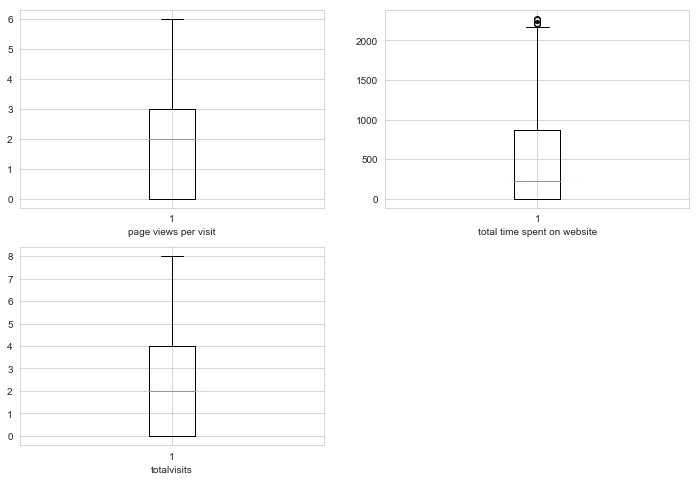

In [1332]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.boxplot(df['page views per visit'])
plt.xlabel('page views per visit')
plt.subplot(2,2,2)
plt.boxplot(df['total time spent on website'])
plt.xlabel('total time spent on website')
plt.subplot(2,2,3)
plt.boxplot(df['totalvisits'])
plt.xlabel('totalvisits')
plt.show()

__The outliers have been treated.__

In [1333]:
# Checking the shape of the dataframe after outlier treatment
df.shape

(8235, 15)

In [1334]:
# Percentage of datapoints removed by data cleaning and outlier treatment
round((9240-8235)/9240*100,2)

10.88

__We have lost 11% data points during data cleaning and outlier treatment. We still have 8235 data points to work with which is a good amount.__ 

## Data Preparation

### Creating dummy variables

In [1335]:
# Binary Mapping
varlist =  ['a free copy of mastering the interview','through recommendations', 'search', 'do not email','do not call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [1336]:
# Dummy variables for categorical variables
df=pd.get_dummies(df,columns=['lead origin', 'lead source', 'last notable activity', 'last activity'], drop_first=True)
df.head()

,prospect id,lead number,do not email,do not call,converted,totalvisits,total time spent on website,page views per visit,search,through recommendations,...,last activity_Form Submitted on Website,last activity_Had a Phone Conversation,last activity_Olark Chat Conversation,last activity_Page Visited on Website,last activity_Resubscribed to emails,last activity_SMS Sent,last activity_Unreachable,last activity_Unsubscribed,last activity_View in browser link Clicked,last activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1337]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235 entries, 0 to 9239
Data columns (total 65 columns):
prospect id                                           8235 non-null object
lead number                                           8235 non-null int64
do not email                                          8235 non-null int64
do not call                                           8235 non-null int64
converted                                             8235 non-null int64
totalvisits                                           8235 non-null float64
total time spent on website                           8235 non-null int64
page views per visit                                  8235 non-null float64
search                                                8235 non-null int64
through recommendations                               8235 non-null int64
a free copy of mastering the interview                8235 non-null int64
lead origin_Landing Page Submission                   8235 non-null uint8


(8235, 65)

## Test Train Split

In [1338]:
# importing train_test_split from sklearn.model_selection library
from sklearn.model_selection import train_test_split

In [1339]:
X = df.drop(['converted','prospect id','lead number'], axis=1)

X.head()

,do not email,do not call,totalvisits,total time spent on website,page views per visit,search,through recommendations,a free copy of mastering the interview,lead origin_Landing Page Submission,lead origin_Lead Add Form,...,last activity_Form Submitted on Website,last activity_Had a Phone Conversation,last activity_Olark Chat Conversation,last activity_Page Visited on Website,last activity_Resubscribed to emails,last activity_SMS Sent,last activity_Unreachable,last activity_Unsubscribed,last activity_View in browser link Clicked,last activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1340]:
# Putting response variable to y
y = df['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [1341]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Scaling

In [1342]:
scaler = StandardScaler()

In [1343]:
# Applying scaler to all variables except dummy variables.
num_vars = ['totalvisits', 'total time spent on website', 'page views per visit']

X_train[num_vars]=scaler.fit_transform(X_train[num_vars])

In [1344]:
X_train.head()

,do not email,do not call,totalvisits,total time spent on website,page views per visit,search,through recommendations,a free copy of mastering the interview,lead origin_Landing Page Submission,lead origin_Lead Add Form,...,last activity_Form Submitted on Website,last activity_Had a Phone Conversation,last activity_Olark Chat Conversation,last activity_Page Visited on Website,last activity_Resubscribed to emails,last activity_SMS Sent,last activity_Unreachable,last activity_Unsubscribed,last activity_View in browser link Clicked,last activity_Visited Booth in Tradeshow
5792,0,0,-1.237208,-0.861871,-1.237696,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8192,0,0,-0.277995,0.811804,-0.024037,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2843,0,0,2.599643,-0.416295,-0.266769,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8964,0,0,0.681217,-0.512038,1.189621,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8457,0,0,0.201611,-0.600417,-0.327452,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1345]:
X_train.describe()

,do not email,do not call,totalvisits,total time spent on website,page views per visit,search,through recommendations,a free copy of mastering the interview,lead origin_Landing Page Submission,lead origin_Lead Add Form,...,last activity_Form Submitted on Website,last activity_Had a Phone Conversation,last activity_Olark Chat Conversation,last activity_Page Visited on Website,last activity_Resubscribed to emails,last activity_SMS Sent,last activity_Unreachable,last activity_Unsubscribed,last activity_View in browser link Clicked,last activity_Visited Booth in Tradeshow
count,5764.000000,5764.000000,5.764000e+03,5.764000e+03,5.764000e+03,5764.00000,5764.000000,5764.000000,5764.000000,5764.000000,...,5764.000000,5764.000000,5764.000000,5764.000000,5764.0,5764.000000,5764.000000,5764.000000,5764.000000,5764.0
mean,0.077724,0.000173,2.850580e-16,-1.470217e-16,3.594224e-17,0.00052,0.000347,0.298057,0.517176,0.069570,...,0.012491,0.002255,0.111034,0.056037,0.0,0.302741,0.009368,0.007634,0.000347,0.0
std,0.267760,0.013172,1.000087e+00,1.000087e+00,1.000087e+00,0.02281,0.018626,0.457444,0.499748,0.254443,...,0.111074,0.047441,0.314201,0.230014,0.0,0.459484,0.096345,0.087044,0.018626,0.0
min,0.000000,0.000000,-1.237208e+00,-8.618715e-01,-1.237696e+00,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,-1.237208e+00,-8.618715e-01,-1.237696e+00,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,-2.779953e-01,-4.365481e-01,-2.403735e-02,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,6.812174e-01,7.643922e-01,5.827920e-01,0.00000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,2.599643e+00,3.321396e+00,2.403280e+00,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


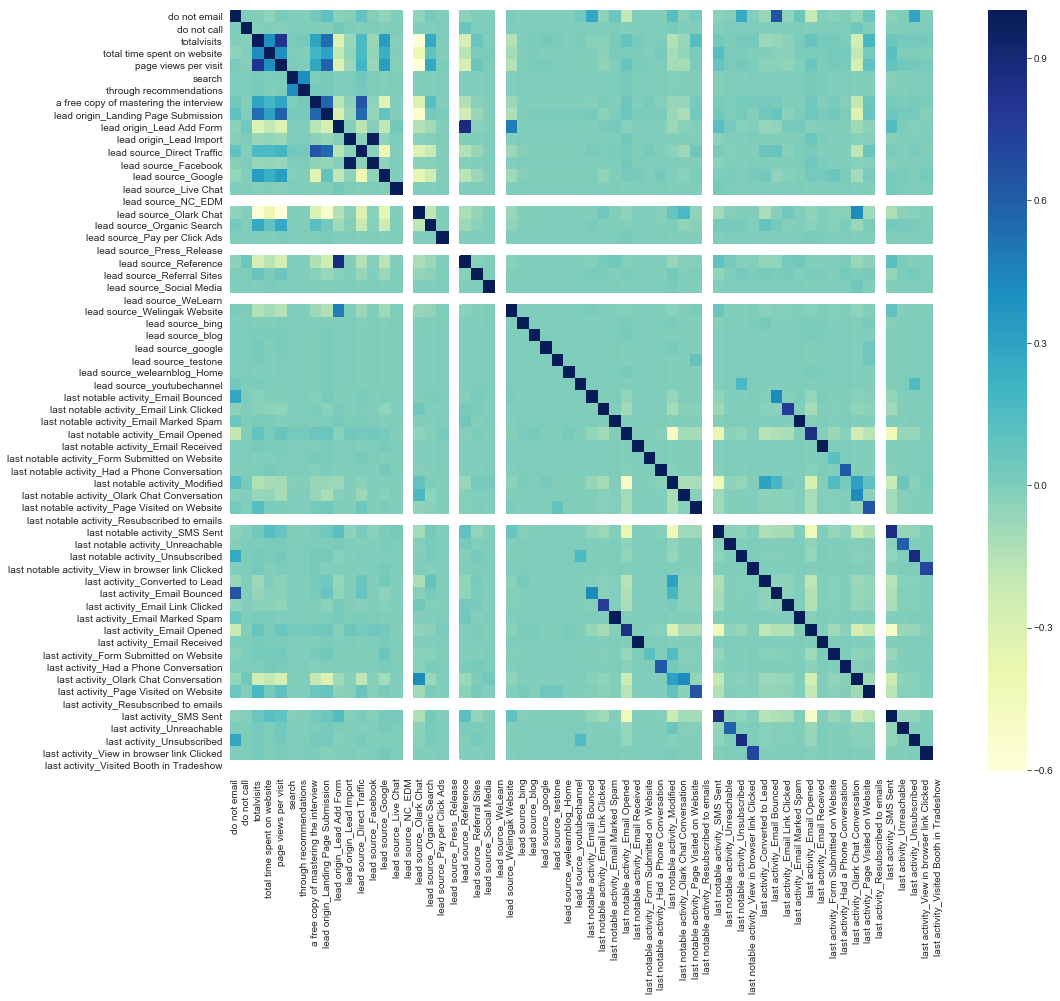

In [1346]:
# plotting correlation of all the features over a heat map
plt.figure(figsize = (16, 14))
sns.heatmap(X_train.corr(), annot = False, cmap="YlGnBu")
plt.show()

__We can see some strong correlations between some variables. We will remove some features using RFE at later stage in analysis.__

## Building a Logistic Regression Model

In [1347]:
import statsmodels.api as sm

In [1348]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5709
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2462.1
Date:                Mon, 10 Jun 2019   Deviance:                       4924.2
Time:                        12:11:40   Pearson chi2:                 5.88e+03
No. Iterations:                    23   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 22.8581   2.27e+05      0.000      1.000   -4.45e+05    4.45e+05
do not email                                          -1.1579      0.229     -5.065      0.000      -1.606      -0.710
do not call                                           24.1043   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
totalvisits                                            0.3220      0.065      4.941      0.000       0.194       0.450
total time spent on website                            1.1165      0.042     26.586      0.000       1.034       1.199
page views per visit                                  -0.2664      0.067     -3.999      0.000      -0.397      -0.136
search                                                -0.0438      1.460     -0.030      0.976      -2.905       2.817
through recommendations                                1.6690      1.595      1.046      0.295      -1.457       4.795
a free copy of mastering the interview                -0.0262      0.117     -0.224      0.823      -0.255       0.202
lead origin_Landing Page Submission                   -0.1639      0.114     -1.438      0.151      -0.387       0.060
lead origin_Lead Add Form                             26.5822   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
lead origin_Lead Import                               25.8887   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
lead source_Direct Traffic                            -0.2131   1.85e+05  -1.15e-06      1.000   -3.63e+05    3.63e+05
lead source_Facebook                                 -24.7043   2.27e+05     -0.000      1.000   -4.45e+05    4.45e+05
lead source_Google                                     0.0003   1.85e+05   1.37e-09      1.000   -3.63e+05    3.63e+05
lead source_Live Chat                                 -1.5497   1.85e+05  -8.36e-06      1.000   -3.63e+05    3.63e+05
lead source_NC_EDM                                 -1.262e-09      0.000  -7.75e-06      1.000      -0.000       0.000
lead source_Olark Chat                                 1.0743   1.85e+05    5.8e-06      1.000   -3.63e+05    3.63e+05
lead source_Organic Search                            -0.1707   1.85e+05  -9.21e-07      1.000   -3.63e+05    3.63e+05
lead source_Pay per Click Ads                        -22.6211   2.27e+05  -9.97e-05      1.000   -4.45e+05    4.45e+05
lead source_Press_Release                          -3.659e-10      0.000  -3.53e-06      1.000      -0.000       0.000
lead source_Reference                                -22.3067   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
lead source_Referral Sites                            -0.3714   1.85e+05     -2e-06      1.000   -3.63e+05    3.63e+05
lead source_Social Media                              26.4578   2.27

__We have a lot of insignificant features and it's impractical to carry out manual elimination. So, let use RFE for feature elimination.__

In [1349]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

## Feature Elimination Using RFE

In [1350]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1351]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False])

In [1352]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do not email', True, 1),
 ('do not call', False, 19),
 ('totalvisits', False, 24),
 ('total time spent on website', True, 1),
 ('page views per visit', False, 23),
 ('search', False, 33),
 ('through recommendations', False, 3),
 ('a free copy of mastering the interview', False, 42),
 ('lead origin_Landing Page Submission', False, 30),
 ('lead origin_Lead Add Form', True, 1),
 ('lead origin_Lead Import', True, 1),
 ('lead source_Direct Traffic', False, 6),
 ('lead source_Facebook', False, 41),
 ('lead source_Google', False, 9),
 ('lead source_Live Chat', False, 40),
 ('lead source_NC_EDM', False, 47),
 ('lead source_Olark Chat', True, 1),
 ('lead source_Organic Search', False, 8),
 ('lead source_Pay per Click Ads', False, 32),
 ('lead source_Press_Release', False, 44),
 ('lead source_Reference', True, 1),
 ('lead source_Referral Sites', False, 7),
 ('lead source_Social Media', True, 1),
 ('lead source_WeLearn', False, 46),
 ('lead source_Welingak Website', True, 1),
 ('lead source_bi

In [1353]:
col = X_train.columns[rfe.support_]

In [1354]:
# Eliminated Features
X_train.columns[~rfe.support_]

Index(['do not call', 'totalvisits', 'page views per visit', 'search',
       'through recommendations', 'a free copy of mastering the interview',
       'lead origin_Landing Page Submission', 'lead source_Direct Traffic',
       'lead source_Facebook', 'lead source_Google', 'lead source_Live Chat',
       'lead source_NC_EDM', 'lead source_Organic Search',
       'lead source_Pay per Click Ads', 'lead source_Press_Release',
       'lead source_Referral Sites', 'lead source_WeLearn', 'lead source_bing',
       'lead source_blog', 'lead source_google', 'lead source_testone',
       'lead source_welearnblog_Home', 'lead source_youtubechannel',
       'last notable activity_Email Bounced',
       'last notable activity_Email Link Clicked',
       'last notable activity_Email Marked Spam',
       'last notable activity_Email Opened',
       'last notable activity_Email Received',
       'last notable activity_Form Submitted on Website',
       'last notable activity_Had a Phone Conversatio

In [1355]:
# Applying the model again with the RFE selected features
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5748
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.2
Date:                Mon, 10 Jun 2019   Deviance:                       5026.5
Time:                        12:11:42   Pearson chi2:                 5.94e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3148      0.054    -24.330      0.000      -1.421      -1.209
do not email                              -1.2838      0.216     -5.933      0.000      -1.708      -0.860
total time spent on website                1.1174      0.041     27.056      0.000       1.036       1.198
lead origin_Lead Add Form                 26.4020   7.09e+04      0.000      1.000   -1.39e+05    1.39e+05
lead origin_Lead Import                    1.4305      0.494      2.897      0.004       0.463       2.398
lead source_Olark Chat                     1.2311      0.103     11.924      0.000       1.029       1.433
lead source_Reference                    -21.9594   7.09e+04     -0.000      1.000   -1.39e+05    1.39e+05
lead source_Social Media                  26.4933   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
lead source_Welingak Website              -0.0284    7.2e+04  -3.95e-07      1.000   -1.41e+05    1.41e+05
last notable activity_SMS Sent             1.6409      0.082     19.945      0.000       1.480       1.802
last notable activity_Unreachable          2.2105      0.620      3.567      0.000       0.996       3.425
last notable activity_Unsubscribed         1.2485      0.479      2.609      0.009       0.311       2.186
last activity_Converted to Lead           -1.0080      0.200     -5.038      0.000      -1.400      -0.616
last activity_Email Bounced               -0.8723      0.395     -2.210      0.027      -1.646      -0.099
last activity_Had a Phone Conversation     2.1337      0.773      2.760      0.006       0.618       3.649
last activity_Olark Chat Conversation     -1.5874      0.166     -9.568      0.000      -1.913      -1.262
==========================================================================================================
"""

In [1356]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5792    0.978239
8192    0.119716
2843    0.144308
8964    0.438787
8457    0.027301
6916    0.401713
4172    0.866093
3838    0.586481
7942    0.074859
7531    0.259848
dtype: float64

In [1357]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97823872, 0.11971569, 0.14430834, 0.438787  , 0.02730128,
       0.40171292, 0.86609331, 0.58648106, 0.07485911, 0.2598477 ])

In [1358]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_prob':y_train_pred})
y_train_pred_final['prospectid'] = y_train.index
y_train_pred_final.head()

,converted,conversion_prob,prospectid
0,1,0.978239,5792
1,0,0.119716,8192
2,0,0.144308,2843
3,0,0.438787,8964
4,0,0.027301,8457


In [1359]:
# Creating a new column predicted with if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted
0,1,0.978239,5792,1
1,0,0.119716,8192,0
2,0,0.144308,2843,0
3,0,0.438787,8964,0
4,0,0.027301,8457,0


In [1360]:
from sklearn import metrics

In [1361]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3150  437]
 [ 715 1462]]


In [1362]:
# Actual/Predicted   no_conversion  conversion
# no_conversion         3150          437
# conversion            715          1462  

In [1363]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8001387925052047


## Checking VIFs

In [1364]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,lead origin_Lead Add Form,133.79
5,lead source_Reference,102.67
7,lead source_Welingak Website,32.00
0,do not email,2.12
12,last activity_Email Bounced,1.93
4,lead source_Olark Chat,1.60
14,last activity_Olark Chat Conversation,1.37
1,total time spent on website,1.27
8,last notable activity_SMS Sent,1.19
10,last notable activity_Unsubscribed,1.16


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'lead origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [1365]:
# Dropping 'lead origin_Lead Add Form'
col = col.drop('lead origin_Lead Add Form', 1)
col

Index(['do not email', 'total time spent on website',
       'lead origin_Lead Import', 'lead source_Olark Chat',
       'lead source_Reference', 'lead source_Social Media',
       'lead source_Welingak Website', 'last notable activity_SMS Sent',
       'last notable activity_Unreachable',
       'last notable activity_Unsubscribed', 'last activity_Converted to Lead',
       'last activity_Email Bounced', 'last activity_Had a Phone Conversation',
       'last activity_Olark Chat Conversation'],
      dtype='object')

In [1366]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5749
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.0
Date:                Mon, 10 Jun 2019   Deviance:                       5038.1
Time:                        12:11:44   Pearson chi2:                 5.95e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3072      0.054    -24.262      0.000      -1.413      -1.202
do not email                              -1.2864      0.216     -5.951      0.000      -1.710      -0.863
total time spent on website                1.1119      0.041     26.988      0.000       1.031       1.193
lead origin_Lead Import                    1.4182      0.494      2.872      0.004       0.450       2.386
lead source_Olark Chat                     1.2200      0.103     11.837      0.000       1.018       1.422
lead source_Reference                      4.4310      0.246     17.981      0.000       3.948       4.914
lead source_Social Media                  26.4915   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
lead source_Welingak Website              26.3625   1.24e+04      0.002      0.998   -2.42e+04    2.42e+04
last notable activity_SMS Sent             1.6386      0.082     19.944      0.000       1.478       1.800
last notable activity_Unreachable          2.2032      0.619      3.558      0.000       0.989       3.417
last notable activity_Unsubscribed         1.2471      0.478      2.609      0.009       0.310       2.184
last activity_Converted to Lead           -1.0121      0.200     -5.064      0.000      -1.404      -0.620
last activity_Email Bounced               -0.8727      0.394     -2.213      0.027      -1.646      -0.100
last activity_Had a Phone Conversation     2.1270      0.773      2.753      0.006       0.613       3.641
last activity_Olark Chat Conversation     -1.5884      0.166     -9.579      0.000      -1.913      -1.263
==========================================================================================================
"""

__'lead source_Social Media' is having a high p-value and will be removed in further steps.__

In [1367]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5792    0.978208
8192    0.119944
2843    0.145536
8964    0.440811
8457    0.027567
6916    0.403870
4172    0.865833
3838    0.586327
7942    0.075169
7531    0.260100
dtype: float64

In [1368]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97820766, 0.11994373, 0.14553555, 0.44081086, 0.02756733,
       0.40387016, 0.86583309, 0.58632717, 0.07516851, 0.26010013])

In [1369]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_prob':y_train_pred})
y_train_pred_final['prospectid'] = y_train.index
y_train_pred_final.head()

,converted,conversion_prob,prospectid
0,1,0.978208,5792
1,0,0.119944,8192
2,0,0.145536,2843
3,0,0.440811,8964
4,0,0.027567,8457


In [1370]:
# Creating a new column predicted with if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted
0,1,0.978208,5792,1
1,0,0.119944,8192,0
2,0,0.145536,2843,0
3,0,0.440811,8964,0
4,0,0.027567,8457,0


In [1371]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7987508674531575


__No much drop in accuracy compared to the previous model.__

## Checking VIFs

In [1372]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,do not email,2.12
11,last activity_Email Bounced,1.93
3,lead source_Olark Chat,1.60
13,last activity_Olark Chat Conversation,1.37
1,total time spent on website,1.27
7,last notable activity_SMS Sent,1.19
9,last notable activity_Unsubscribed,1.16
4,lead source_Reference,1.10
6,lead source_Welingak Website,1.04
2,lead origin_Lead Import,1.00


In [1373]:
# Dropping 'lead source_Social Media'
col = col.drop('lead source_Social Media', 1)
col

Index(['do not email', 'total time spent on website',
       'lead origin_Lead Import', 'lead source_Olark Chat',
       'lead source_Reference', 'lead source_Welingak Website',
       'last notable activity_SMS Sent', 'last notable activity_Unreachable',
       'last notable activity_Unsubscribed', 'last activity_Converted to Lead',
       'last activity_Email Bounced', 'last activity_Had a Phone Conversation',
       'last activity_Olark Chat Conversation'],
      dtype='object')

In [1374]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5750
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.1
Date:                Mon, 10 Jun 2019   Deviance:                       5042.2
Time:                        12:11:45   Pearson chi2:                 5.94e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3063      0.054    -24.252      0.000      -1.412      -1.201
do not email                              -1.2870      0.216     -5.954      0.000      -1.711      -0.863
total time spent on website                1.1122      0.041     26.998      0.000       1.031       1.193
lead origin_Lead Import                    1.4175      0.494      2.871      0.004       0.450       2.385
lead source_Olark Chat                     1.2157      0.103     11.800      0.000       1.014       1.418
lead source_Reference                      4.4297      0.246     17.978      0.000       3.947       4.913
lead source_Welingak Website              26.3607   1.24e+04      0.002      0.998   -2.42e+04    2.42e+04
last notable activity_SMS Sent             1.6386      0.082     19.944      0.000       1.478       1.800
last notable activity_Unreachable          2.2027      0.619      3.557      0.000       0.989       3.416
last notable activity_Unsubscribed         1.2475      0.478      2.610      0.009       0.311       2.184
last activity_Converted to Lead           -1.0132      0.200     -5.069      0.000      -1.405      -0.621
last activity_Email Bounced               -0.8725      0.394     -2.212      0.027      -1.646      -0.100
last activity_Had a Phone Conversation     2.1262      0.773      2.752      0.006       0.612       3.640
last activity_Olark Chat Conversation     -1.5658      0.165     -9.515      0.000      -1.888      -1.243
==========================================================================================================
"""

__'lead source_Welingak Website' is having a high p-value and will be removed in further steps.__

In [1375]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5792    0.978194
8192    0.122469
2843    0.145630
8964    0.440993
8457    0.028199
6916    0.404039
4172    0.865981
3838    0.586641
7942    0.075153
7531    0.259386
dtype: float64

In [1376]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97819378, 0.12246914, 0.14562995, 0.4409934 , 0.02819922,
       0.40403923, 0.86598085, 0.58664127, 0.07515276, 0.25938604])

In [1377]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_prob':y_train_pred})
y_train_pred_final['prospectid'] = y_train.index
y_train_pred_final.head()

,converted,conversion_prob,prospectid
0,1,0.978194,5792
1,0,0.122469,8192
2,0,0.145630,2843
3,0,0.440993,8964
4,0,0.028199,8457


In [1378]:
# Creating a new column predicted with if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted
0,1,0.978194,5792,1
1,0,0.122469,8192,0
2,0,0.145630,2843,0
3,0,0.440993,8964,0
4,0,0.028199,8457,0


In [1379]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7985773768216516


__Not much change in the model accuracy compared to the previous model.__

In [1380]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,do not email,2.12
10,last activity_Email Bounced,1.93
3,lead source_Olark Chat,1.60
12,last activity_Olark Chat Conversation,1.36
1,total time spent on website,1.27
6,last notable activity_SMS Sent,1.19
8,last notable activity_Unsubscribed,1.16
4,lead source_Reference,1.10
5,lead source_Welingak Website,1.04
2,lead origin_Lead Import,1.00


In [1381]:
# Dropping 'lead source_Welingak Website'
col = col.drop('lead source_Welingak Website', 1)
col

Index(['do not email', 'total time spent on website',
       'lead origin_Lead Import', 'lead source_Olark Chat',
       'lead source_Reference', 'last notable activity_SMS Sent',
       'last notable activity_Unreachable',
       'last notable activity_Unsubscribed', 'last activity_Converted to Lead',
       'last activity_Email Bounced', 'last activity_Had a Phone Conversation',
       'last activity_Olark Chat Conversation'],
      dtype='object')

In [1382]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5751
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2676.0
Date:                Mon, 10 Jun 2019   Deviance:                       5352.0
Time:                        12:11:46   Pearson chi2:                 6.03e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.1402      0.050    -22.641      0.000      -1.239      -1.042
do not email                              -1.0919      0.198     -5.502      0.000      -1.481      -0.703
total time spent on website                0.9784      0.039     25.207      0.000       0.902       1.055
lead origin_Lead Import                    1.1362      0.493      2.305      0.021       0.170       2.102
lead source_Olark Chat                     0.9419      0.099      9.512      0.000       0.748       1.136
lead source_Reference                      4.1427      0.244     16.947      0.000       3.664       4.622
last notable activity_SMS Sent             1.6387      0.080     20.587      0.000       1.483       1.795
last notable activity_Unreachable          2.0494      0.610      3.357      0.001       0.853       3.246
last notable activity_Unsubscribed         0.9737      0.461      2.113      0.035       0.070       1.877
last activity_Converted to Lead           -1.0987      0.195     -5.637      0.000      -1.481      -0.717
last activity_Email Bounced               -0.9980      0.371     -2.689      0.007      -1.725      -0.271
last activity_Had a Phone Conversation     1.9594      0.750      2.611      0.009       0.489       3.430
last activity_Olark Chat Conversation     -1.5499      0.161     -9.620      0.000      -1.866      -1.234
==========================================================================================================
"""

__p-values for all the features look good now. Let's also check the model accuracy and VIFs.__

In [1383]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5792    0.978073
8192    0.130580
2843    0.175443
8964    0.499370
8457    0.036348
6916    0.466094
4172    0.863850
3838    0.578604
7942    0.082669
7531    0.260842
dtype: float64

In [1384]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97807267, 0.13058028, 0.17544338, 0.49936976, 0.03634753,
       0.46609374, 0.8638499 , 0.57860388, 0.0826692 , 0.26084206])

In [1385]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_prob':y_train_pred})
y_train_pred_final['prospectid'] = y_train.index
y_train_pred_final.head()

,converted,conversion_prob,prospectid
0,1,0.978073,5792
1,0,0.130580,8192
2,0,0.175443,2843
3,0,0.499370,8964
4,0,0.036348,8457


In [1386]:
# Creating a new column predicted with if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted
0,1,0.978073,5792,1
1,0,0.130580,8192,0
2,0,0.175443,2843,0
3,0,0.499370,8964,0
4,0,0.036348,8457,0


In [1387]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7796668979875087


__Model Accuracy isn't affected much.__

In [1388]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,do not email,2.12
9,last activity_Email Bounced,1.93
3,lead source_Olark Chat,1.59
11,last activity_Olark Chat Conversation,1.36
1,total time spent on website,1.24
5,last notable activity_SMS Sent,1.16
7,last notable activity_Unsubscribed,1.16
4,lead source_Reference,1.10
2,lead origin_Lead Import,1.00
6,last notable activity_Unreachable,1.00


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [1389]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3089  498]
 [ 772 1405]]


In [1390]:
# Actual/Predicted   no_conversion  conversion
# no_conversion         3089          498
# conversion            772          1405  

In [1391]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7796668979875087


# Word Document Question (1 & 2)

### Queston 1: Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [1392]:
# Checking for the coefficients of the final varaibles
res.params

const                                    -1.140212
do not email                             -1.091935
total time spent on website               0.978435
lead origin_Lead Import                   1.136200
lead source_Olark Chat                    0.941901
lead source_Reference                     4.142660
last notable activity_SMS Sent            1.638688
last notable activity_Unreachable         2.049392
last notable activity_Unsubscribed        0.973723
last activity_Converted to Lead          -1.098694
last activity_Email Bounced              -0.997980
last activity_Had a Phone Conversation    1.959365
last activity_Olark Chat Conversation    -1.549923
dtype: float64

__From above, the final variables and their corresponding coefficients can be identified. Coefficients here can be assumed as weightage of each variable in determining the odds of conversion. Hence, the top 3 variables would be:__

* lead source_Reference (4.14)
* last activity_Had a Phone Conversation (1.95)
* last notable activity_SMS Sent (1.63)

### Question 2: What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

__We can see in the answer of question 1, the top 3 variables are either categorical/dummy variables. Hence, the top 3 categorical/dummy variables would be:__

* lead source_Reference (4.14)
* last activity_Had a Phone Conversation (1.95)
* last notable activity_SMS Sent (1.63)

## Checking other metrics beyond accuracy

In [1393]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1394]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.645383555351401

In [1395]:
# Let us calculate specificity
TN / float(TN+FP)

0.861165319208252

__Our current model seems to have good accuracy (0.779) and specificity (0.861) but less sensitivity (0.645). Since our model needs to predict the conversions well, we actually need to have better sensitivity. We will analyze a few more factors before revising the current model.__

In [1396]:
# Calculate false postive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.138834680791748


In [1397]:
# positive predictive value 
print (TP / float(TP+FP))

0.7383079348397268


In [1398]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8000518000518001


## Plotting the ROC curve

In [1399]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1400]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.conversion_prob, drop_intermediate = False )

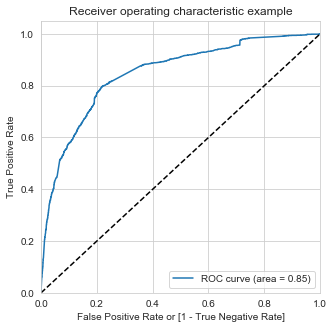

In [1401]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.conversion_prob)

__Area under the curve is 0.85__

## Finding optimal cutoff pioint

In [1402]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0


In [1403]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377689  1.000000  0.000000
0.1   0.1  0.543199  0.979329  0.278506
0.2   0.2  0.685461  0.893891  0.558963
0.3   0.3  0.782096  0.802940  0.769445
0.4   0.4  0.787127  0.757005  0.805408
0.5   0.5  0.779667  0.645384  0.861165
0.6   0.6  0.777238  0.548002  0.916365
0.7   0.7  0.746877  0.403307  0.955394
0.8   0.8  0.725711  0.318328  0.972958
0.9   0.9  0.668112  0.135048  0.991636


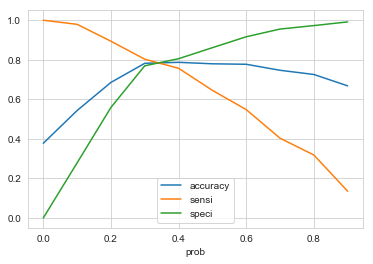

In [1404]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

__Optimal Cutoff seems to be somewhere around 0.35__

In [1405]:
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0


In [1406]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7796668979875087


In [1407]:
# Let's take a look at the confusion matrix again 
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
print(confusion2)

[[2832  755]
 [ 471 1706]]


In [1408]:
# Actual/Predicted   no_conversion  conversion
# no_conversion         2860          727
# conversion            491          1686  

In [1409]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1410]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7836472209462563

In [1411]:
# Let us calculate specificity
TN / float(TN+FP)

0.7895177028157234

In [1412]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21048229718427655


In [1413]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6932141405932548


In [1414]:
# Negative predictive value
print (TN / float(TN+ FN))

0.857402361489555


## Precision and Recall

In [1415]:
from sklearn.metrics import precision_score, recall_score

# Precision Score
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.6932141405932548

In [1416]:
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7836472209462563

## Precision and Recall Tradeoff

In [1417]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      1
 11      0
 12      0
 13      1
 14      1
 15      0
 16      1
 17      1
 18      1
 19      0
 20      0
 21      0
 22      0
 23      0
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
        ..
 5734    0
 5735    0
 5736    1
 5737    1
 5738    1
 5739    0
 5740    0
 5741    0
 5742    1
 5743    0
 5744    0
 5745    0
 5746    0
 5747    1
 5748    1
 5749    1
 5750    0
 5751    0
 5752    0
 5753    1
 5754    0
 5755    1
 5756    0
 5757    0
 5758    0
 5759    0
 5760    0
 5761    0
 5762    0
 5763    1
 Name: converted, Length: 5764, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
 5       1
 6       1
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      1
 15      0
 16      1
 17      1
 18      1
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      

In [1418]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.conversion_prob)

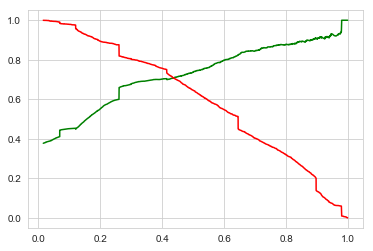

In [1419]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Precision and recall cutoff point is 0.44**

In [1420]:
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0


In [1421]:
from sklearn.metrics import precision_score, recall_score

# Precision Score
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7103192966219343

In [1422]:
# Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7050987597611392

__For cutoff of 0.44:__

* Precision - 0.71  
* Recall - 0.70 

# The Business Objective

The CEO of X Education would like to assign lead scores to all the leads and identify the hot leads such that the conversion rate is 80% i.e. the lead score cutoff needs to be adjusted in such a way that, of all the hot leads identified, 80% of them should convert.

Since, our objective is to have 80% conversion, our model evaluation parameters should be precision and recall. Also, we need to make sure that our model precision is 80%.

__Please note that we are shooting for a precision value higher than optimum (0.71) value obtained above. So, this would reduce the recall.__

In [1423]:
# Let's change the conversion_prob cutoff to be 0.5 and check for precison and recall values
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x >= 0.5 else 0)

y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0


In [1424]:
# Precision Score
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7383079348397268

In [1425]:
# Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.645383555351401

__Precision is less than 0.8. Let's further increase the cutoff__

In [1426]:
# Let's change the conversion_prob cutoff to be 0.6 and check for precison and recall values
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x >= 0.6 else 0)

y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0


In [1427]:
# Precision Score
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7990622906898861

In [1428]:
# Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.5480018373909049

__We are pretty close to our target precision score of 0.8. Let's increase the cut-off by a unit.__

In [1429]:
# Let's change the conversion_prob cutoff to be 0.61 and check for precison and recall values
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x >= 0.61 else 0)

y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0


In [1430]:
# Precision Score
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8019191226867718

In [1431]:
# Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.5374368396876436

In [1432]:
# Adding column lead score
y_train_pred_final['lead_score'] = y_train_pred_final.conversion_prob.map( lambda x: round(x*100,1))

y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1,97.8
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0,13.1
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0,17.5
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,0,49.9
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0,3.6


__Hence for a lead score >= 61, we are getting a precision of 80% i.e. of all the hot leads detected, 80% of them actually converted.__

__Let's run the same for the test set and check if the results hold true.__

## Making predictions on the test set

In [1433]:
# Applying Scaling on the test set
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [1434]:
X_test = X_test[col]
X_test.head()

,do not email,total time spent on website,lead origin_Lead Import,lead source_Olark Chat,lead source_Reference,last notable activity_SMS Sent,last notable activity_Unreachable,last notable activity_Unsubscribed,last activity_Converted to Lead,last activity_Email Bounced,last activity_Had a Phone Conversation,last activity_Olark Chat Conversation
7509,0,-0.861871,0,1,0,0,0,0,0,0,0,0
2465,0,-0.747715,0,0,0,0,0,0,0,0,0,0
2132,0,-0.861871,0,0,1,0,0,0,0,0,0,0
1409,0,-0.858189,0,0,0,0,0,0,0,0,0,0
785,0,0.458288,0,0,0,0,0,0,0,0,0,0


In [1435]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [1436]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [1437]:
y_test_pred[:10]

7509    0.260842
2465    0.133333
2132    0.896522
1409    0.121330
785     0.333631
6416    0.069686
1431    0.123264
135     0.884050
8737    0.192191
1951    0.668358
dtype: float64

In [1438]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1439]:
# Let's see the head
y_pred_1.head()

,0
7509,0.260842
2465,0.133333
2132,0.896522
1409,0.121330
785,0.333631


In [1440]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,converted
7509,0
2465,0
2132,1
1409,0
785,1


In [1441]:
# Putting CustID to index
y_test_df['custid'] = y_test_df.index

In [1442]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1443]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1444]:
y_pred_final.head()

,converted,custid,0
0,0,7509,0.260842
1,0,2465,0.133333
2,1,2132,0.896522
3,0,1409,0.121330
4,1,785,0.333631


In [1445]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'conversion_prob'})

In [1446]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['custid','converted','conversion_prob'], axis=1)

In [1447]:
# Let's see the head of y_pred_final
y_pred_final.head()

,custid,converted,conversion_prob
0,7509,0,0.260842
1,2465,0,0.133333
2,2132,1,0.896522
3,1409,0,0.121330
4,785,1,0.333631


In [1448]:
# Let's consider all the leads with conversion_prob>=0.61 as hot leads based on our training set observations
y_pred_final['final_predicted'] = y_pred_final.conversion_prob.map(lambda x: 1 if x >= 0.61 else 0)
y_pred_final.head()

,custid,converted,conversion_prob,final_predicted
0,7509,0,0.260842,0
1,2465,0,0.133333,0
2,2132,1,0.896522,1
3,1409,0,0.121330,0
4,785,1,0.333631,0


## Let's Check for Precision and Recall

In [1449]:
# Precision Score
precision_score(y_pred_final.converted, y_pred_final.final_predicted)

0.7753743760399334

In [1450]:
# Recall Score
recall_score(y_pred_final.converted, y_pred_final.final_predicted)

0.5253664036076663

__We are at 77.5% precision for the test set i.e. of all the hot leads that we detected 77.5% of them actually convered.__

__So, we are pretty close to the results obtained in the training set. Hence, for 80% conversion we need to target all the leads>= 61 lead score / 0.61 conversion_prob.__

# Word Document Questions

### Question 3: X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

Here the goal is to increase the sensitivity/recall so that, all the potential leads can be identified. From the observation on the train data set, it can be identified that. So, let's assume that we need to idnetify atleast 90% of the actual leads i.e. the sensitivity is 90%. So, let's determine the cutoff conversion_prob / lead score for that.

We already know that for a optimal cutoff probability of 0.35 we are having a sensitivity of 0.779. So, we need to reduce the cutoff further to accommodate as many leads as possible

In [1451]:
# Let's change the conversion_prob cutoff to be 0.19 and check for precison and recall values
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x >= 0.19 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.conversion_prob.map( lambda x: round(x*100,1))
y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1,97.8
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0,13.1
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0,17.5
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,1,49.9
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0,3.6


In [1452]:
# Let's take a look at the confusion matrix again 
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
print(confusion2)

[[1923 1664]
 [ 211 1966]]


In [1453]:
# Actual/Predicted   no_conversion  conversion
# no_conversion         1923         1664
# conversion            211          1966  

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1454]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9030776297657327

In [1455]:
# Let us calculate specificity
TN / float(TN+FP)

0.5361025926958461

In [1456]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.4638974073041539


__On comparision to the optimum cutoff of 0.35 / 35 lead score (using accuracy, sensitivity & specificity), a cutoff of 0.19/19 lead score would increase the sensititvity by 12% & false positive rate by 26%. Since, we have got more interns, contacting those customers with lead score>= 19 would enable them in identifying around 90% of the potential leads.__

### Question 4: Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In the scenario explained above, the customers to target should have high lead scores. The cutoff in this case is adjusted for highest precision.

In [1457]:
# Let's set conversion_prob cutoff to be 0.8 and check for precison and recall values
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x >= 0.8 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.conversion_prob.map( lambda x: round(x*100,1))
y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1,97.8
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0,13.1
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0,17.5
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,0,49.9
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0,3.6


In [1458]:
# Precision Score
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8772151898734177

In [1459]:
# Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.3183279742765273

__For a cutoff of 0.8 / a lead score of 80, the precision is 87.7%. Let's further increase the precision.__

In [1460]:
# Let's change the conversion_prob cutoff to be 0.95 and check for precison and recall values
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x >= 0.95 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.conversion_prob.map( lambda x: round(x*100,1))
y_train_pred_final.head()

,converted,conversion_prob,prospectid,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.978073,5792,1,1,1,1,1,1,1,1,1,1,1,1,97.8
1,0,0.130580,8192,0,1,1,0,0,0,0,0,0,0,0,0,13.1
2,0,0.175443,2843,0,1,1,0,0,0,0,0,0,0,0,0,17.5
3,0,0.499370,8964,0,1,1,1,1,1,0,0,0,0,0,0,49.9
4,0,0.036348,8457,0,1,0,0,0,0,0,0,0,0,0,0,3.6


In [1461]:
# Precision Score
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.9285714285714286

In [1462]:
# Recall Score
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.07165824529168581

__Here we can observe that, if X-education targets customers with lead score>= 95, there is a 0.928 probability of conversion. In this case, recall is not an important factor because X-education has already met their target and are now aiming for those leads which have the highest conversion probability__